In [ ]:
!pip install tensorflow==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 9.8 kB/s 
     |████████████████████████████████| 14.8 MB 43.9 MB/s 
     |████████████████████████████████| 3.8 MB 45.5 MB/s 
     |████████████████████████████████| 132 kB 49.6 MB/s 
     |████████████████████████████████| 462 kB 58.6 MB/s 
     |████████████████████████████████| 2.9 MB 50.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68734 sha256=4c9a5261a9ccd20a36e70fec9c6f432f5d82c11c26f42ca62b91bc55a6eb4656
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: 

In [ ]:
!pip3 install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 430 kB 7.6 MB/s 
     |████████████████████████████████| 1.5 MB 56.3 MB/s 
     |████████████████████████████████| 151 kB 53.0 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 8.4 MB 38.4 MB/s 
     |████████████████████████████████| 42 kB 455 kB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 843 kB 31.4 MB/s 
     |████████████████████████████████| 96 kB 2.8 MB/s 
     |████████████████████████████████| 117 kB 15.3 MB/s 
     |████████████████████████████████| 96 kB 5.9 MB/s 
     |████████████████████████████████| 3.1 MB 42.0 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 344 kB 48.9 MB/s 
     |████████████████████████████████| 59.9 M

So let’s first start with semantic segmentation, it is a segmentation method by which we can segment or highlight objects or categories belonging to the same class by one colour. In the below code we have used pixellib’s method called semantic_segmentation, which takes deeplabV3 which is a pre-trained model for semantic segmentation

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation
import tensorflow as tf

# Performing semantic segmentation 
segment_image = semantic_segmentation()
model_semantic = tf.keras.utils.get_file('deeplabv3_xception65_ade20k.h5','https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.3/deeplabv3_xception65_ade20k.h5')

segment_image.load_ade20k_model(model_semantic)
# get image from web
image = tf.keras.utils.get_file('test1.jpeg','https://analyticsindiamag.com/wp-content/uploads/2022/06/test1.jpeg')
result1 = segment_image.segmentAsAde20k(image, output_image_name = "test output.png",overlay = True )

327680/320367 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed Image saved successfully in your current working directory.


In [ ]:
from PIL import Image
im_or = Image.open(image)
im_or

Output hidden; open in https://colab.research.google.com to view.

(-0.5, 1279.5, 719.5, -0.5)

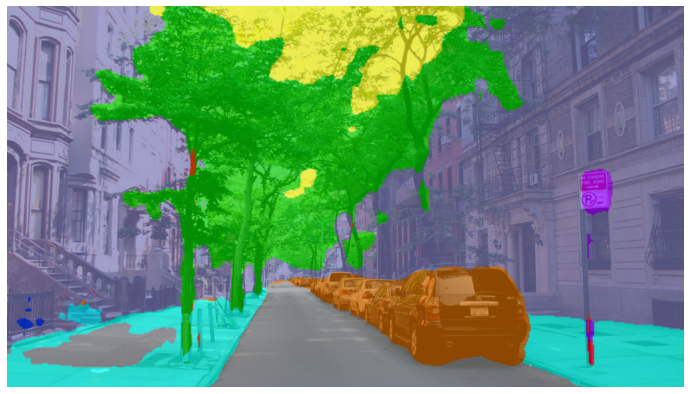

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.imshow(result1[1])
plt.axis('off')

# **Instance Segmentation**

Now let's see the instance segmentation, as above the API and code approach is the same. We just need to load the instance segmentation method from the pixellib library and the suitable pre-trained model. The pre-trained model used for this task is Maksed RCNN which is trained on the coco dataset. 

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation
import tensorflow as tf

In [ ]:
# performing instance segementation 
instance_image = instance_segmentation()
model_inst = tf.keras.utils.get_file('mask_rcnn_coco.h5','https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5')
instance_image.load_model(model_inst)
instance_image.select_target_classes(car=True)
image = tf.keras.utils.get_file('test1.jpeg','https://analyticsindiamag.com/wp-content/uploads/2022/06/test1.jpeg')
result2 = instance_image.segmentImage(image, output_image_name = "test output insta.png")

Processed image saved successfully in your current working directory.


(-0.5, 1279.5, 719.5, -0.5)

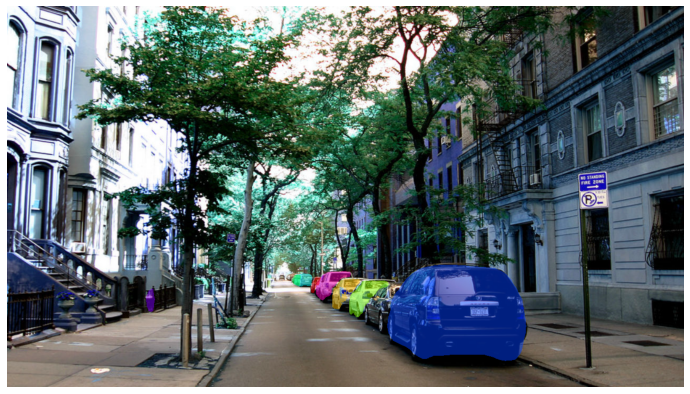

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.imshow(result2[1])
plt.axis('off')

# **Segmentation by K-Means clustering**

The unsupervised clustering algorithms group the similar data points, the same behaviour of the clustering algorithm can be applied to the cluster of the pixels and in turn, it will resemble the effect of the image segmentation.

In this method we are using the KNN clustering method, the below code takes loads of our test image using OpenCV, then minor processing is carried out like changing the colour channel and reshaping the dimensions and then finally we will KNN method cluster/segment the object in the image.    

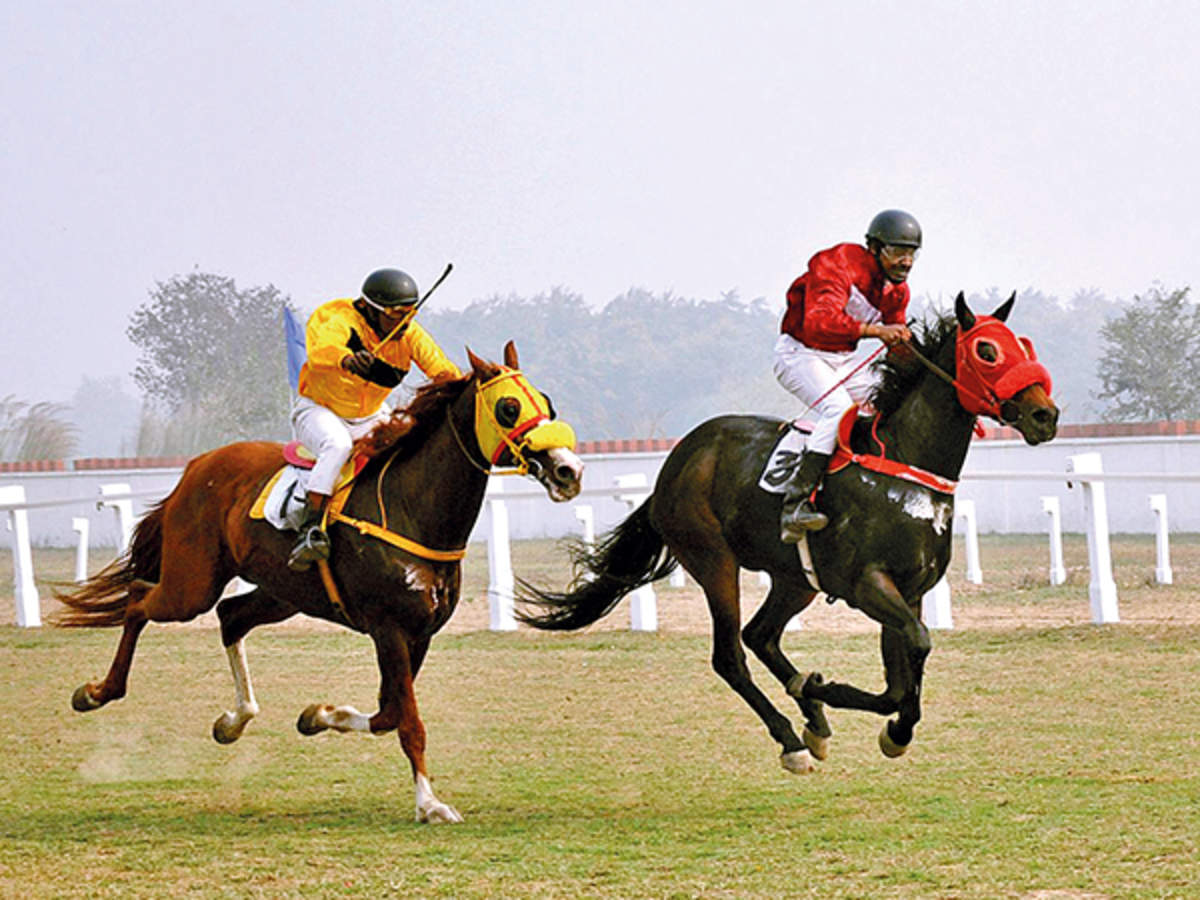

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Reading and preprocessing image
image = tf.keras.utils.get_file('test.jpeg','https://analyticsindiamag.com/wp-content/uploads/2022/06/test.jpeg')
img = plt.imread(image)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

# our original image 
Image.open(image)

In [ ]:
# Applying K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
K = 2
attempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

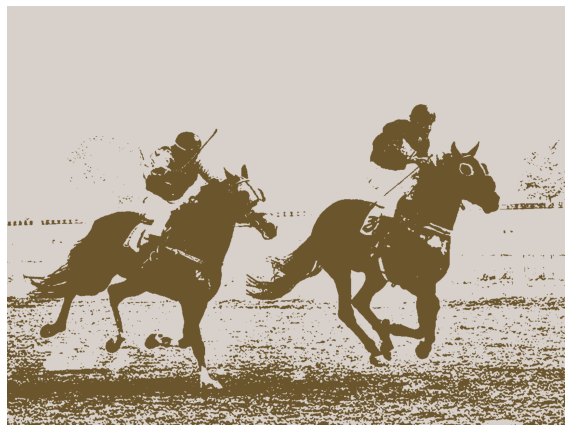

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(result_image[:,:,::-1])
plt.axis('off')
plt.show()

# **Segmentation via Edge detection**

As we know the edge detection technique is used to detect the boundaries in the image which is carried by simply detecting changes in pixel values. This same method can be used to segment the objects in the given image.   

So below we are using the Prewitt edge detection method to segment the image. 

(-0.5, 1199.5, 899.5, -0.5)

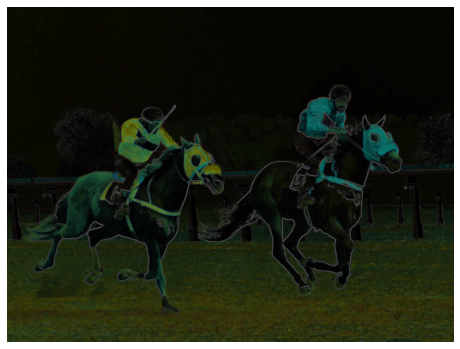

In [ ]:
# Sobel segmentataion 
from skimage import filters
plt.figure(figsize=(8,8))
res_img = filters.prewitt(img)
plt.imshow(res_img)
plt.axis('off')

# **Region based segmentation**

The region-based segmentation method groups similar objects and segments each object from the form of the group. Below we are performing region-based segmentation using the scikit-image library.

We are trying a region-based method using the watershed transformation. First, we find an elevation map using the Sobel gradient of the image as shown below.

(-0.5, 383.5, 302.5, -0.5)

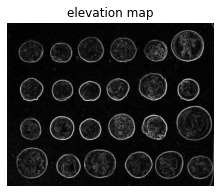

In [ ]:
from skimage.filters import sobel
from skimage import data
import matplotlib.pyplot as plt

#Findinfg the evaluation map
coins = data.coins()
elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

Using the above evaluation map we are going to the markers between the coins and background. 

(-0.5, 383.5, 302.5, -0.5)

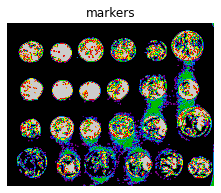

In [ ]:
# Finding marker for coins
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

In [ ]:
from skimage import segmentation
# Filling the above regions 
segmentation_coins = segmentation.watershed(elevation_map, markers)

Now we all are set to perform the segmentation, using watershed transform we will region coins and label each pixel and will label each coin individually.  

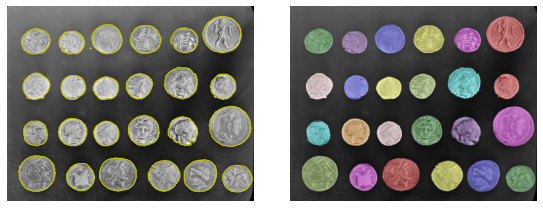

In [ ]:
from skimage.color import label2rgb
from scipy import ndimage as ndi

# Segmenting and label leblling individual coin
segmentation_coins = ndi.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndi.label(segmentation_coins)
image_label_overlay = label2rgb(labeled_coins, image=coins, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()